In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train),(x_test, y_test) = load_data(path='boston_housing.npz',
                                                test_split=0.2,
                                                seed = 777)

In [2]:
print(x_train.shape,x_test.shape)

(404, 13) (102, 13)


In [3]:
# import pandas as pd

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# print(train.shape,test.shape)
# print(train.head())

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split (x_train, y_train, test_size=0.33, random_state=777)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import KFold

K = 3

kfold = KFold(n_splits=K)

def get_model():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1], )))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

mae_list = []
history_list = []

for tr_idx, val_idx in kfold.split(x_tr):
    x_tr_fold, x_val_fold = x_tr[tr_idx], x_tr[val_idx]
    y_tr_fold, y_val_fold = y_tr[tr_idx], y_tr[val_idx]
    
    model = get_model()
    
    history = model.fit(x_tr, y_tr,
                        epochs=300,
                        validation_data = (x_val, y_val))
    
    _, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)
    history_list.append(history)



Epoch 1/300
9/9 [==============================] - 0s 9ms/step - loss: 541.7778 - mae: 21.6308 - val_loss: 593.9776 - val_mae: 22.1381
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 517.6724 - mae: 21.0676 - val_loss: 567.4398 - val_mae: 21.5215
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 492.6899 - mae: 20.4597 - val_loss: 538.1823 - val_mae: 20.8220
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 463.1709 - mae: 19.7354 - val_loss: 503.3775 - val_mae: 19.9627
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 428.3644 - mae: 18.8205 - val_loss: 460.0139 - val_mae: 18.8627
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 383.6157 - mae: 17.6515 - val_loss: 408.7402 - val_mae: 17.4725
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 331.1570 - mae: 16.2036 - val_loss: 349.1519 - val_mae: 15.8209
Epoch 8/300
9/9 [==============================] - 0s 2

In [8]:
print(mae_list)
print(np.mean(mae_list))

[2.961933135986328, 3.034803867340088, 3.204662799835205]
3.0671332677205405


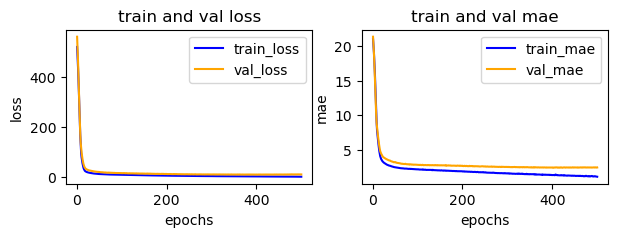

In [27]:

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (7, 2))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['mae']
val_acc = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()